# CSMODEL MACHINE PROJECT PHASE 1

## Phase 1: Dataset Description, Data Cleaning, and Research Question & Data Analysis

### 1. Dataset Description
- Provide a clear description of the dataset.
- Explain how the dataset was collected and discuss any potential biases or implications.
- Describe the structure of the dataset:
  - What each row and column represents
  - Number of observations
  - Attributes/features present
- Briefly explain each attribute (for structured data) or the nature of the observations (for unstructured data).

### 2. Data Cleaning
- Document the cleaning steps taken, such as:
  - Multiple representations of the same categorical value
  - Incorrect datatypes
  - Missing data
  - Duplicate data
  - Inconsistent formatting
  - Outliers
- For unstructured data, mention any transformation applied to convert it into a usable format.

### 3. Research Question & EDA
- Define a general research question relevant to your dataset.
- Conduct Exploratory Data Analysis (EDA) iteratively with the research question.
- Include at least 3 EDA questions and answer each using:
  - Summary statistics (e.g., mean, median, standard deviation)
  - Visualizations (e.g., histograms, box plots, distribution plots)

## Dataset Description

### About the Dataset
This dataset is a detailed record compiled by *The Washington Post* documenting every on-screen death in the **Game of Thrones** TV series across all eight seasons. It includes characters, background extras, and animals. When exact counts weren’t possible, educated estimations based on visual evidence were used.

### Data Collection and Methodology

**Criteria:**
- The character is killed on-screen.
- The character dies off-screen, but the death is confirmed or assumed due to imminent death while on screen.
- Only prominent off-screen deaths are listed. (Prominence is determined mainly by importance to the plot.)

**Key Methodological Notes:**
- Dragonfire and wildfire deaths were estimated by visible area of effect and troop density.
- Deaths are attributed to the direct killer, not the one who ordered the kill—unless the killer is unknown.
- Special treatment is given to undead (wights), resurrections, and ambiguous causes of death.

**Notes:**
- If a character orders the death of another, the character who does the direct killing receives credit, not the one who orders the kill. But for cases in which where the direct killer is unidentifiable, the order-giver receives credit.
- In cases of overlapping weapon types (e.g. magic fireball vs. fire vs. magic), the weapon category is assigned based on the origin. For example, dragonfire is considered an “animal” death and magic fireball is considered a “magic” death.
- If a character is mercy-killed, the mercy kill is used to categorize the death, not the injuries leading up to the moment.
  
### Dataset Structure

- **Total Observations:** 6,887 deaths
- **Total Attributes:** 11

The following are the descriptions of each variable in the dataset.
- **`order`**: A unique index for the chronological order of deaths.
- **`season`**: Season number (1 to 8) in which the death occurred.
- **`episode`**: Episode number within the respective season.
- **`character_killed`**: Name of the deceased character or creature.
- **`killer`**: Name of the killer (individual, creature, or group).
- **`method`**: Specific method of death (e.g., “Dragonfire”, “Sword (Ice)”).
- **`method_cat`**: General category of death method (e.g., “Animal”, “Blade”, “Magic”).
- **`reason`**: Explanation or motivation for the death (e.g., “Deserting the Night’s Watch”).
- **`location`**: Specific place where the death occurred (e.g., “Winterfell”).
- **`allegiance`**: Group, house, or faction the deceased belonged to.
- **`importance`**: Level of narrative importance (1 = Background extra, 4 = Major character).

## Data Cleaning
### This section explains all the procedures applied during the data cleaning process.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
plt.style.use('ggplot')

%matplotlib inline

In [123]:
GOTdeaths_df = pd.read_csv('game-of-thrones-deaths-data.csv')

In [124]:
GOTdeaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6887 entries, 0 to 6886
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order             6887 non-null   int64  
 1   season            6887 non-null   int64  
 2   episode           6887 non-null   int64  
 3   character_killed  6887 non-null   object 
 4   killer            6410 non-null   object 
 5   method            6887 non-null   object 
 6   method_cat        6887 non-null   object 
 7   reason            6886 non-null   object 
 8   location          6887 non-null   object 
 9   allegiance        3136 non-null   object 
 10  importance        6886 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 592.0+ KB


In [125]:
GOTdeaths_df

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,NaN,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


## Multiple representations of the same value

In [126]:
print(GOTdeaths_df['season'].unique())
print(GOTdeaths_df['episode'].unique())
print(GOTdeaths_df['method'].unique())
print(GOTdeaths_df['method_cat'].unique())
print(GOTdeaths_df['importance'].unique())

[1 2 3 4 5 6 7 8]
[ 1  2  4  5  6  7  8  9 10  3]
['Ice sword' 'Sword (Ice)' 'Direwolf teeth' 'Antler' 'Poison' 'Arakh'
 'Unknown (likely a sword)' 'Knife' 'Spear' 'Sword' 'Bolo' 'Mace' 'Shield'
 'Arrow' 'Molten gold' 'Tusk' 'Sword (Needle)' 'Fire' 'Hands' 'Hammer'
 'Magic' 'Pillow' 'Starvation' 'Poison (magic?)' 'Water (drowning)'
 'Unknown' 'Rat' 'Shadow Demon' 'Poison dart' 'Wildfire' 'Blunt object'
 'Flaming arrow' 'Boulder' 'Axe' 'Bludgeon' 'Dragonfire'
 'Sword (Longclaw)' 'Sealed into vault' 'Illness' 'Broken foot' 'Falling'
 'Dragonglass' 'Hanging' 'Dogs' 'Moon Door' 'Giant arrow' 'Nail' 'Pot'
 'Butcher’s knife' 'Barrel' 'Burning oil' 'Mammoth foot' 'Scythe'
 'Magic fireball' 'Magic barrier' 'Hands/Necklace' 'Sword (Oathkeeper)'
 'Poisoned water' 'Old Age' 'Flaying' 'Rock' 'Shucking' 'Club' 'Foot'
 'Giant’s foot' 'Flaming log' 'Giant plank' 'Dragon feet' 'Dragon teeth'
 'Lipstick poison' 'Dragonglass spear' 'Ice scimitar' 'Knives'
 'Horse’s hooves' 'Flame flail' 'Tree' 'Flaming 

There are no multiple representations of the same value.

## Handling missing data

In [127]:
GOTdeaths_df.isnull().sum()
GOTdeaths_df[GOTdeaths_df['killer'].isnull()]


,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
60,61,2,1,The Silver,NaN,Starvation,Other,No food or water in the Red Waste,Red Waste,"Dothraki, House Targaryen",2.0
191,192,3,2,Hoster Tully,NaN,Illness,Other,NaN,Riverrun,House Tully,2.0
196,197,3,4,Bannen,NaN,Broken foot,Other,Critically wounded at the Battle of the Fist o...,Beyond the Wall,Night’s Watch,1.0
211,212,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
212,213,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4490,4491,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,NaN,1.0
4491,4492,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,NaN,1.0
4492,4493,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,NaN,1.0
4493,4494,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,NaN,1.0


In [128]:
print(GOTdeaths_df.dtypes)

order                 int64
season                int64
episode               int64
character_killed     object
killer               object
method               object
method_cat           object
reason               object
location             object
allegiance           object
importance          float64
dtype: object


the criteria states that - Only prominent off-screen deaths are listed. (Prominence is determined mainly by importance to the plot.)
as such, wights with lowest importance are not included in the dataset.

In [129]:
GOTdeaths_df = GOTdeaths_df[
    ~((GOTdeaths_df['character_killed'].str.lower() == 'wight') & (GOTdeaths_df['killer'].isnull()) & (GOTdeaths_df['importance'] == 1.0))
]


In [130]:
GOTdeaths_df[GOTdeaths_df['killer'].isnull()]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
60,61,2,1,The Silver,NaN,Starvation,Other,No food or water in the Red Waste,Red Waste,"Dothraki, House Targaryen",2.0
191,192,3,2,Hoster Tully,NaN,Illness,Other,NaN,Riverrun,House Tully,2.0
196,197,3,4,Bannen,NaN,Broken foot,Other,Critically wounded at the Battle of the Fist o...,Beyond the Wall,Night’s Watch,1.0
211,212,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
212,213,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
213,214,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
214,215,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
215,216,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
216,217,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,1.0
398,399,4,9,Night’s Watch brother,NaN,Burning oil,Fire/Burning,Killed during the Battle of Castle Black,The Wall,Night’s Watch,1.0


All entries with null 'killers' are now listed as No direct killer since the kill has no direct killer/order giver

In [131]:

GOTdeaths_df['killer'] = GOTdeaths_df['killer'].fillna('No direct killer')

C:\Users\escan\AppData\Local\Temp\ipykernel_38004\1868228584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOTdeaths_df['killer'] = GOTdeaths_df['killer'].fillna('No direct killer')


null reason will be replaced with 'Unknown' as the data is not available

In [132]:
GOTdeaths_df[GOTdeaths_df['reason'].isnull()]
GOTdeaths_df.at[191, 'reason'] = 'Unknown'

All character deaths with null allegiance will be listed as 'Unknown'

In [133]:
GOTdeaths_df.isnull().sum()
GOTdeaths_df[GOTdeaths_df['allegiance'].isnull()]
GOTdeaths_df['allegiance'] = GOTdeaths_df['allegiance'].fillna('Unknown')

C:\Users\escan\AppData\Local\Temp\ipykernel_38004\1074672203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOTdeaths_df['allegiance'] = GOTdeaths_df['allegiance'].fillna('Unknown')


In [134]:
GOTdeaths_df[GOTdeaths_df['importance'].isnull()]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
4477,4478,8,3,Wight,Brienne of Tarth,Sword (Oathkeeper),Blade,Killed during the Battle of Winterfell,Winterfell,Unknown,NaN


All entries with null importance are removed from the dataset as they are not relevant for the analysis

In [135]:
GOTdeaths_df = GOTdeaths_df[GOTdeaths_df['importance'].notnull()]

## Fixing incorrect data types and values

In [136]:
GOTdeaths_df.dtypes

order                 int64
season                int64
episode               int64
character_killed     object
killer               object
method               object
method_cat           object
reason               object
location             object
allegiance           object
importance          float64
dtype: object

There are no conflicting data types in the DataFrame.

## Resolving duplicates and outliers

In [137]:
# Find duplicate 'order' values
duplicates = GOTdeaths_df[GOTdeaths_df.duplicated('order', keep=False)]
print(duplicates)

Empty DataFrame
Columns: [order, season, episode, character_killed, killer, method, method_cat, reason, location, allegiance, importance]
Index: []


there are no duplicates of character_killed in the data (Wildlings and Wights are not duplicates since they are background characters but still not the same)

In [138]:
print(GOTdeaths_df['character_killed'].unique())

['Waymar Royce' 'Gared' 'Will' 'Stag' 'Direwolf' 'Jon Arryn'
 'Dothraki man' 'Catspaw assassin' 'Mycah' 'Lady' 'Ser Hugh of the Vale'
 'Clegane’s horse' 'Stark soldier' 'Tribesman' 'Lannister soldier'
 'Jory Cassel' 'Wallen' 'Wildling' 'Stiv' 'Vardis Egen'
 'Viserys Targaryen' 'Robert Baratheon' 'Vayon Poole' 'Stark staff member'
 'Septa Mordane' 'Syrio Forel' 'Stableboy' 'Othor' 'Jafer Flowers' 'Mago'
 'Raven' 'Drogo’s horse' 'Qotho' 'Pigeon' 'Ned Stark' 'Rhaego'
 'Khal Drogo' 'Mirri Maz Duur' 'Knight' 'The Silver' 'Maester Cressen'
 'Barra (Baratheon illegitimate daughter)'
 'Robert Baratheon’s illegitimate son' 'Rakharo' 'Yoren'
 'Night’s Watch recruit' 'Lommy Greenhands' 'Rennick' 'Prisoner'
 'Renly Baratheon' 'Baratheon of Storm’s End guard' 'The Tickler'
 'Rodrik Cassel' 'High Septon' 'Peasant' 'Amory Lorch' 'Drennan' 'Irri'
 'Alton Lannister' 'Torrhen Karstark' 'The Spice King' 'The Silk King'
 'The Copper King' 'Member of the Thirteen' 'Billy' 'Jack'
 'Matthos Seaworth' 'Barath

In [139]:
importance_counts = GOTdeaths_df.groupby('importance').size()
print(importance_counts)

importance
1.0    6217
2.0      85
3.0      75
4.0      44
dtype: int64


# EDA Question

### General Question: What are the patterns in character deaths throughout the GOT series?

1) What is the distribution of character deaths over the seasons?
2) How does allegiance influence the likelihood of a character's death?
3) How does the method category correlate with the character's importance to the story?


## 1) What is the distribution of character deaths over the seasons?

Grouping by episode and season, counting character deaths per episode

To analyze the distribution of deaths throughout the Game of Thrones series, we group the dataset by both `episode` and `season`. This allows us to count the number of character deaths that occur in each episode for every season. Such grouping provides a granular view of how deaths are distributed not just across seasons, but within individual episodes, highlighting spikes during major battles or significant plot events.

This approach enables us to:
- Identify episodes with unusually high or low death counts.
- Observe trends or patterns in deaths across the series timeline.
- Detect outlier episodes (such as major battles) that deviate from the typical episode death count.

The resulting grouped data is used for further statistical analysis (mean, median, IQR, etc.) and for creating visualizations like line charts and heatmaps, which help illustrate the intensity and frequency of deaths throughout the show.

In [140]:
deaths_per_episode = GOTdeaths_df.groupby(['episode', 'season'])['character_killed'].count()

deaths_per_episode_unstacked = deaths_per_episode.unstack(level=0)

def get_filtered_stats(data_series, name):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]
    
    return {
        'Metric': name,
        'Original_Count': len(data_series),
        'Filtered_Count': len(filtered_data),
        'Outliers_Removed': len(data_series) - len(filtered_data),
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Mean': round(filtered_data.mean(), 2),
        'Median': round(filtered_data.median(), 2),
        'Mode': filtered_data.mode()[0] if not filtered_data.mode().empty else "No Mode",
        'Std_Dev': round(filtered_data.std(), 2)
    }

stats_list = []

for season in deaths_per_episode_unstacked.index:
    deaths = deaths_per_episode_unstacked.loc[season].dropna()
    
    stats_list.append(get_filtered_stats(deaths, f"Season {season}"))

results_df = pd.DataFrame(stats_list)

print("IQR Filtering Results for Deaths Per Episode by Season:")
print("=" * 100)
print(results_df.to_string(index=False))


IQR Filtering Results for Deaths Per Episode by Season:
  Metric  Original_Count  Filtered_Count  Outliers_Removed    Q1      Q3     IQR   Mean  Median  Mode  Std_Dev
Season 1               9               8                 1  3.00    7.00    4.00   5.25     5.0   3.0     3.11
Season 2               9               8                 1  4.00   12.00    8.00   7.25     7.5   8.0     4.65
Season 3               9               8                 1  4.00    7.00    3.00   5.25     5.5   7.0     2.92
Season 4              10               9                 1  6.25   15.00    8.75  10.22     7.0   7.0     7.66
Season 5              10               9                 1  2.25   39.75   37.50  16.22     5.0   2.0    23.70
Season 6              10               8                 2  9.00   51.75   42.75  16.12    10.0   9.0    19.52
Season 7               7               6                 1 21.50   82.50   61.00  41.33    32.0   4.0    39.16
Season 8               5               4                

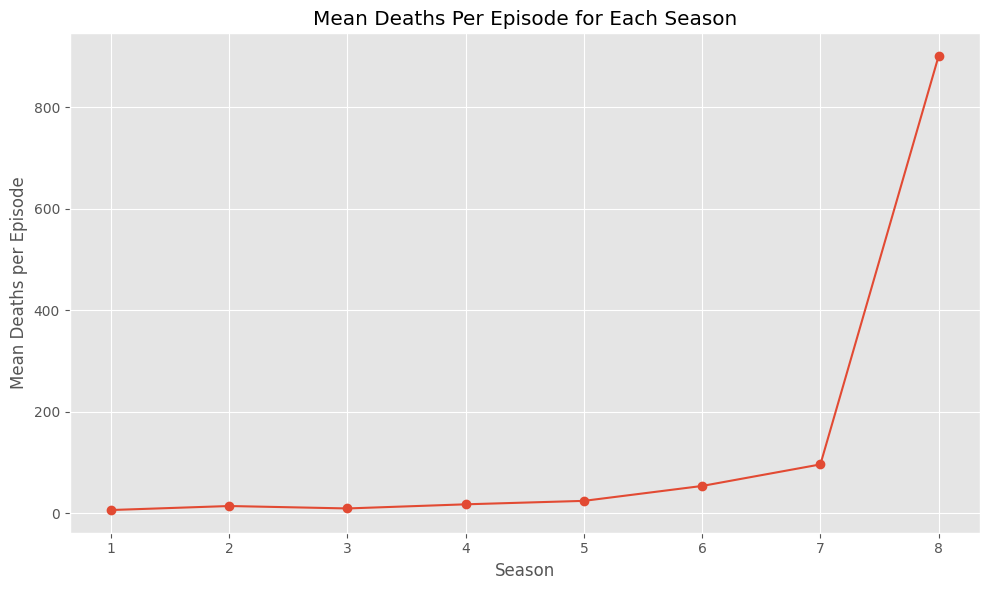

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(mean_deaths_per_season.keys(), mean_deaths_per_season.values(), marker='o')
plt.title('Mean Deaths Per Episode for Each Season')
plt.xlabel('Season')
plt.ylabel('Mean Deaths per Episode')
plt.xticks(range(1, 9))  # For seasons 1 to 8
plt.grid(True)
plt.tight_layout()
plt.show()

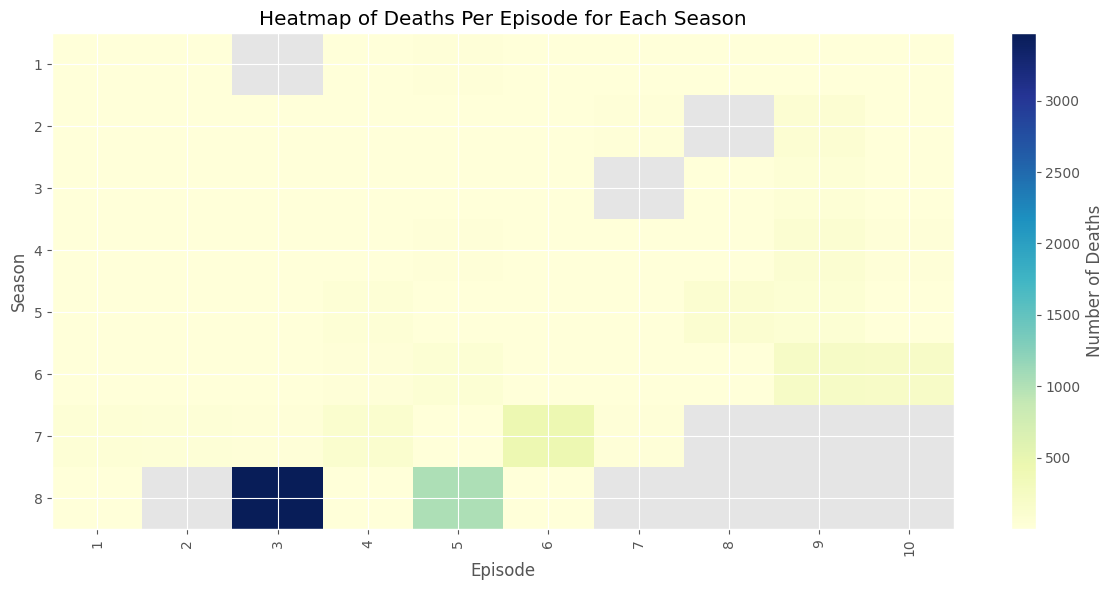

In [142]:
deaths_per_episode = GOTdeaths_df.groupby(['episode', 'season'])['character_killed'].count()

deaths_per_episode_unstacked = deaths_per_episode.unstack(level=0)

plt.figure(figsize=(12, 6))
plt.imshow(deaths_per_episode_unstacked, cmap='YlGnBu', aspect='auto', interpolation='nearest')
plt.colorbar(label='Number of Deaths')

plt.xticks(range(deaths_per_episode_unstacked.shape[1]), deaths_per_episode_unstacked.columns, rotation=90)
plt.yticks(range(deaths_per_episode_unstacked.shape[0]), deaths_per_episode_unstacked.index)

plt.title('Heatmap of Deaths Per Episode for Each Season')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

## 2) What allegiances generates greater amount of deaths?

Grouped the allegiance column and sorted it by the number of character deaths to identify which allegiances experienced the most fatalities. This approach highlights the houses, factions, or groups with the highest death tolls in the Game of Thrones series, providing insight into the narrative focus and the scale of losses among different allegiances. The results show that "Unknown" allegiance accounts for the largest number of deaths, followed by major houses such as House Targaryen, House Lannister, and the Golden Company.

Top 10 Allegiances with Highest Death Counts:
allegiance
Unknown                             3451
House Targaryen                      839
Golden Company, House Lannister      568
House Lannister                      310
Smallfolk                            226
House Stark                          176
Free Folk                            119
House Greyjoy (Euron-aligned)        110
House Bolton                          92
Sons of the Harpy, Great Masters      71
Name: character_killed, dtype: int64


<Axes: xlabel='allegiance'>

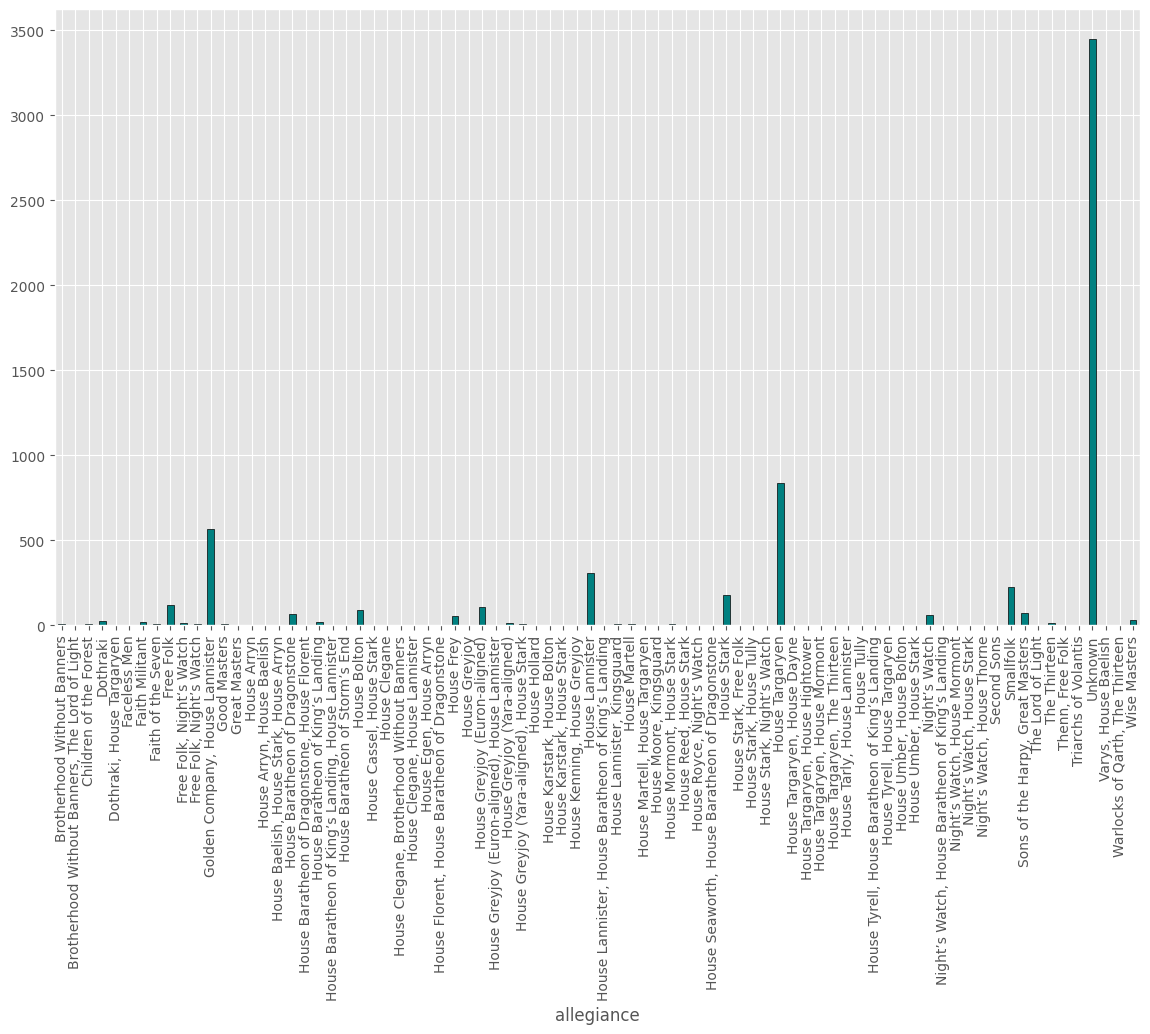

In [143]:
deaths_by_allegiance = GOTdeaths_df.groupby('allegiance')['character_killed'].count()

top_10_deaths = deaths_by_allegiance.sort_values(ascending=False).head(10)
print("Top 10 Allegiances with Highest Death Counts:")
print(top_10_deaths)
plt.figure(figsize=(14,8))
deaths_by_allegiance.plot(kind='bar', color='teal', edgecolor='black')


A bar plot was generated to visualize the number of deaths attributed to each allegiance in the Game of Thrones dataset. This plot highlights which houses, factions, or groups experienced the highest death tolls throughout the series. The top 10 allegiances with the most deaths are labeled, with "Unknown" allegiance accounting for the largest number of deaths, followed by major houses such as House Targaryen, House Lannister, and the Golden Company. This visualization helps identify the scale of losses among different allegiances and provides insight into the narrative focus and major conflicts within the show.

## 3) How does the method category correlate with the character's importance to the story?

### Statistical Analysis: Spearman's Correlation Between Character Importance and Method Category

To investigate the relationship between character importance and the method category of death, we applied Spearman's rank correlation. The analysis followed these steps:

1. **Ranking Method Categories**  
    - Each unique value in the `method_cat` column was assigned an ordinal rank from 1 (deadliest, e.g., "Blade") to 16 ("Other").
    - This transformation allowed the categorical variable to be treated as ordinal for correlation analysis.

2. **Correlation Approach**  
    - Spearman's correlation coefficient was calculated between the ranked method category and the numeric `importance` of each character.
    - Spearman's coefficient measures the strength and direction of a monotonic relationship between two ranked variables.

In [145]:
import scipy.stats as stats

GOTdeaths_df['importance'] = pd.to_numeric(GOTdeaths_df['importance'], errors='coerce')

method_rank = {
    'Blade': 1,
    'Axe': 2,
    'Polearm': 3,
    'Mace': 4,
    'Bludgeon': 5,
    'Arrow': 6,
    'Crushing': 7,
    'Poison': 8,
    'Fire/Burning': 9,
    'Animal': 10,
    'Hands': 11,
    'Magic': 12,
    'Household item': 13,
    'Falling': 14,
    'Unknown': 15,
    'Other': 16
}

GOTdeaths_df['method_rank'] = GOTdeaths_df['method_cat'].map(method_rank)

spearman_corr, p_value = stats.spearmanr(GOTdeaths_df['method_rank'], GOTdeaths_df['importance'])

print("Spearman's Rank Correlation:")
print(f"Spearman's Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between method of death and character importance.")
else:
    print("There is no significant correlation between method of death and character importance.")

Spearman's Rank Correlation:
Spearman's Correlation Coefficient: -0.11649679308942866
P-value: 7.597440076662345e-21
There is a significant correlation between method of death and character importance.


### Visualizing using a scatter plot

To visualize the relationship between the method of death (ranked) and character importance, we use a scatter plot. Each point represents a character death, with jitter added to both axes to reduce overlap and better display the density of points.

- **X-axis:** Method of Death (Ranked, lower is deadlier)
- **Y-axis:** Character Importance (1 = Background, 4 = Major character)
- **Jitter:** Small random noise is added to both axes for better visualization.

This plot helps reveal any trends or clustering, such as whether more important characters tend to die by certain methods.

The code below generates the scatter plot:


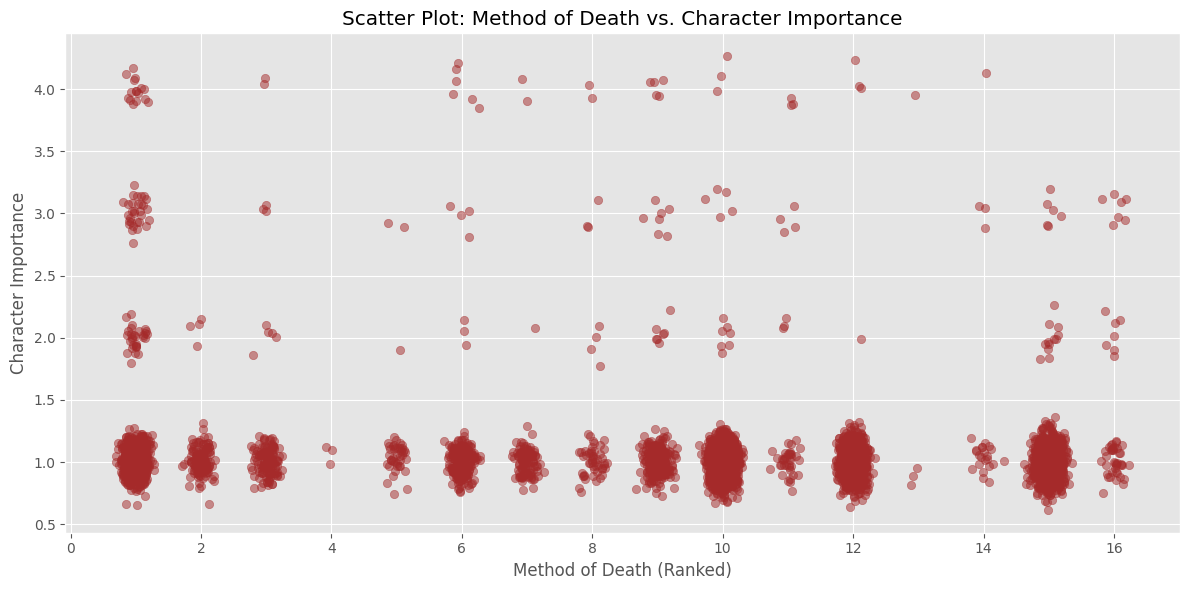

In [147]:
plt.figure(figsize=(12,6))

jitter_strength = 0.1
jittered_method_rank = GOTdeaths_df['method_rank'] + (jitter_strength * np.random.randn(len(GOTdeaths_df)))
jittered_importance = GOTdeaths_df['importance'] + (jitter_strength * np.random.randn(len(GOTdeaths_df)))

plt.scatter(jittered_method_rank, jittered_importance, alpha=0.5, color='brown')

plt.title('Scatter Plot: Method of Death vs. Character Importance')
plt.xlabel('Method of Death (Ranked)')
plt.ylabel('Character Importance')
plt.grid(True)
plt.tight_layout()

plt.show()

### Conclusion

The exploratory data analysis of the Game of Thrones deaths dataset reveals several key insights:

- **Distribution of Deaths Over Seasons:** The number of on-screen deaths increases dramatically in later seasons, peaking in Season 8 due to large-scale battles and significant plot events. Earlier seasons have fewer deaths per episode, while later seasons show both higher averages and greater variability, with notable outliers during major battles.

- **Allegiance and Deaths:** The highest number of deaths is attributed to characters with unknown allegiance, followed by major houses and groups such as House Targaryen, House Lannister, and the Golden Company. This reflects the scale of battles involving unnamed soldiers and background characters, as well as the central role of these houses in the series' conflicts.

- **Method of Death and Character Importance:** There is a statistically significant negative correlation between the method category (ranked by deadliness) and character importance. More important characters are more likely to die by direct, dramatic methods (e.g., blade), while less important characters often die by less direct or less dramatic means.

Overall, the analysis highlights the narrative choices in Game of Thrones, where both the scale and method of deaths are closely tied to the story's progression and the importance of the characters involved.